<a href="https://colab.research.google.com/github/joohoshin/Python_Basic/blob/master/18_2_Random%EC%9C%BC%EB%A1%9C%EB%84%93%EC%9D%B4_%EA%B5%AC%ED%95%98%EA%B8%B0_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random을 활용해서 함수 넓이를 구해봅시다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import pandas as pd

* 그래프를 그릴 x 범위를 정합니다. 
* numpy의 linspace(start, end, n)을 활용하면 start와 end를 n개로 나눈 array를 만들어 줍니다. 

In [ ]:
xmin = -1
xmax = 1
n = 100
x = np.linspace(xmin, xmax, n)
x

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

* 넓이를 그릴 함수를 지정합니다. 

In [ ]:
func_y = lambda x: x**2
y=func_y(x)
y

array([1.00000000e+00, 9.60004081e-01, 9.20824406e-01, 8.82460973e-01,
       8.44913784e-01, 8.08182838e-01, 7.72268136e-01, 7.37169677e-01,
       7.02887460e-01, 6.69421488e-01, 6.36771758e-01, 6.04938272e-01,
       5.73921028e-01, 5.43720029e-01, 5.14335272e-01, 4.85766758e-01,
       4.58014488e-01, 4.31078461e-01, 4.04958678e-01, 3.79655137e-01,
       3.55167840e-01, 3.31496786e-01, 3.08641975e-01, 2.86603408e-01,
       2.65381084e-01, 2.44975003e-01, 2.25385165e-01, 2.06611570e-01,
       1.88654219e-01, 1.71513111e-01, 1.55188246e-01, 1.39679625e-01,
       1.24987246e-01, 1.11111111e-01, 9.80512193e-02, 8.58075707e-02,
       7.43801653e-02, 6.37690032e-02, 5.39740843e-02, 4.49954086e-02,
       3.68329762e-02, 2.94867871e-02, 2.29568411e-02, 1.72431385e-02,
       1.23456790e-02, 8.26446281e-03, 4.99948985e-03, 2.55076013e-03,
       9.18273646e-04, 1.02030405e-04, 1.02030405e-04, 9.18273646e-04,
       2.55076013e-03, 4.99948985e-03, 8.26446281e-03, 1.23456790e-02,
      

* x,y의 최대/최소값을 가지고 사각형의 넓이를 구합니다

In [ ]:
rect_area = (xmax-xmin) * (y.max()-y.min())

In [ ]:
# numpy로 범위 안의 점들을 임의로 만들어 보자
iteration = 10000
rnd_x = np.random.uniform(xmin, xmax, size = iteration)
rnd_y = np.random.uniform(y.min(), y.max(), size=iteration)

In [ ]:
rnd_y.shape

(10000,)

* dataframe으로 만들어봅시다

In [ ]:
df = pd.DataFrame({'rnd_x':rnd_x, 'rnd_y':rnd_y})

In [ ]:
df

,rnd_x,rnd_y
0,0.177097,0.673572
1,0.792063,0.911982
2,0.750116,0.174504
3,0.989194,0.832140
4,-0.117571,0.912678
...,...,...
9995,-0.374604,0.198258
9996,-0.434594,0.270793
9997,0.569305,0.862361
9998,0.581212,0.901111


* rnd_x에 대응하는 true_y값을 계산해봅시다

In [ ]:
df = df.assign(true_y = func_y(df.rnd_x))
df.head()

,rnd_x,rnd_y,true_y
0,0.177097,0.673572,0.031363
1,0.792063,0.911982,0.627363
2,0.750116,0.174504,0.562674
3,0.989194,0.832140,0.978505
4,-0.117571,0.912678,0.013823


* rnd_y가 true_y보다 큰지 작은지 비교해서 크면 0, 작으면 1로 값을 넣겠습니다. 

In [ ]:
df['in_out'] = df.apply(lambda x: 1 if x.rnd_y<=x.true_y else 0, axis = 1)

In [ ]:
df.in_out.value_counts()

0    6735
1    3265
Name: in_out, dtype: int64

* 그래프를 그려봅시다

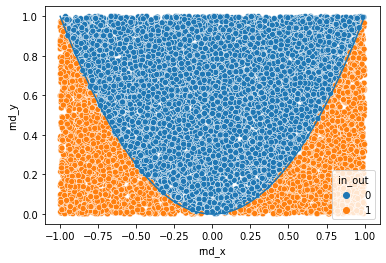

In [ ]:
plt.figure()

# 함수 그래프 출력
plt.plot(x,y)

# 랜덤 포인트 출력
sns.scatterplot(x='rnd_x',y='rnd_y', hue='in_out', data=df )
plt.show()

In [ ]:
# 사각형의 넓이에서 1과0의 비율을 곱해서 계산하면 함수 아래부분의 넓이를 구할 수 있습니다 .
estimate = rect_area * (df.in_out.value_counts()[1]/iteration)
estimate

0.6529333741454953

### 코드를 합쳐봅시다

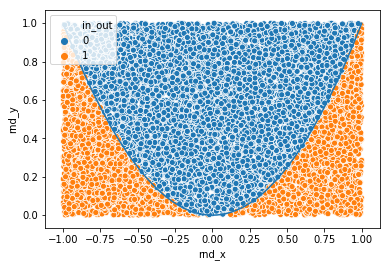

입력한 함수의 x의 범위 -1 ~ 1의 면적의 넓이는 약 0.672731353943475입니다


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import pandas as pd

xmin = -1
xmax = 1
n = 100
x = np.linspace(xmin, xmax, n)

func_y = lambda x: x**2
y=func_y(x)

rect_area = (xmax-xmin) * (y.max()-y.min())

# numpy로 범위 안의 점들을 임의로 만들어 보자
iteration = 10000
rnd_x = np.random.uniform(xmin, xmax, size = iteration)
rnd_y = np.random.uniform(y.min(), y.max(), size=iteration)

# dataframe으로 만들기
df = pd.DataFrame({'rnd_x':rnd_x, 'rnd_y':rnd_y})
df = df.assign(true_y = func_y(df.rnd_x))
df['in_out'] = df.apply(lambda x: 1 if x.rnd_y<=x.true_y else 0, axis = 1)

### 그래프 출력
plt.figure()
# 함수 그래프 출력
plt.plot(x,y)
# 랜덤 포인트 출력
sns.scatterplot(x='rnd_x',y='rnd_y', hue='in_out', data=df )
plt.show()

estimate = rect_area * (df.in_out.value_counts()[1]/iteration)
print('입력한 함수의 x의 범위 {} ~ {}의 면적의 넓이는 약 {}입니다'.format(xmin,xmax, estimate))

### 함수가 0이하의 값을 갖는 경우
* 위에서 0과 1로 분류한 것을 약간 바꿔주면 됩니다

      rnd_x     rnd_y    true_y  in_out
0 -0.990533 -0.586935 -0.018844       0
1  0.629973 -0.932444 -0.603134       0
2 -1.222140 -0.124350  0.493626       0
3  1.540185  1.785550  1.372168       0
4 -1.148923 -0.029124  0.320024       0


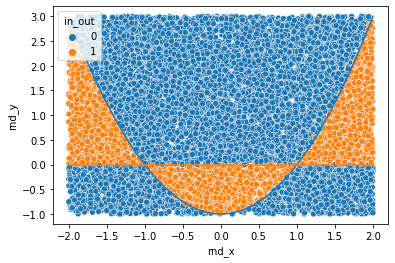

입력한 함수의 x의 범위 -2 ~ 2의 면적의 넓이는 약 4.044387307417611입니다


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import pandas as pd

xmin = -2
xmax = 2
n = 100
x = np.linspace(xmin, xmax, n)

func_y = lambda x: x**2 - 1
y=func_y(x)

rect_area = (xmax-xmin) * (y.max()-y.min())

# numpy로 범위 안의 점들을 임의로 만들어 보자
iteration = 10000
rnd_x = np.random.uniform(xmin, xmax, size = iteration)
rnd_y = np.random.uniform(y.min(), y.max(), size=iteration)

# dataframe으로 만들기
df = pd.DataFrame({'rnd_x':rnd_x, 'rnd_y':rnd_y})
df = df.assign(true_y = func_y(df.rnd_x))

# 범위 포함여부 계산
def in_out(row):
    if row.rnd_y<=row.true_y:
        if row.rnd_y>=0: return 1
        else: return 0
    else:
        if row.rnd_y<=0:return 1
        else: return 0
        
        
df['in_out'] = df.apply(lambda row: in_out(row),axis=1)
print(df.head())

### 그래프 출력
plt.figure()
# 함수 그래프 출력
plt.plot(x,y)
plt.plot(x,[0 for i in x])
# 랜덤 포인트 출력
sns.scatterplot(x='rnd_x',y='rnd_y', hue='in_out', data=df )
plt.show()

in_count = len(df.query('in_out==1'))
estimate = rect_area * (in_count/iteration)
print('입력한 함수의 x의 범위 {} ~ {}의 면적의 넓이는 약 {}입니다'.format(xmin,xmax, estimate))

In [ ]:
in_count/iteration

0.2528